<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week%205/Week_5_netflix_titles_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
file_path = "/content/drive/MyDrive/Dataset/netflix_titles.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


# EDA and Feature engineering

In [ ]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

--- Kolom Categorikal ---
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']

--- Kolom Numerikal ---
['release_year']


In [ ]:
# prompt: buatkan kode analisis distribusi kolom kategorikal

import matplotlib.pyplot as plt
import seaborn as sns

# Analisis distribusi kolom kategorikal
print("\n--- Analisis Distribusi Kolom Kategorikal ---")
for col in categorical_cols:
    print(f"\nDistribusi Kolom: {col}")
    print(df[col].value_counts())
    print(f"\nProporsi Distribusi Kolom: {col}")
    print(df[col].value_counts(normalize=True) * 100)



--- Analisis Distribusi Kolom Kategorikal ---

Distribusi Kolom: show_id
show_id
s8807    1
s1       1
s2       1
s3       1
s4       1
        ..
s12      1
s11      1
s10      1
s9       1
s8       1
Name: count, Length: 8807, dtype: int64

Proporsi Distribusi Kolom: show_id
show_id
s8807    0.011355
s1       0.011355
s2       0.011355
s3       0.011355
s4       0.011355
           ...   
s12      0.011355
s11      0.011355
s10      0.011355
s9       0.011355
s8       0.011355
Name: proportion, Length: 8807, dtype: float64

Distribusi Kolom: type
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Proporsi Distribusi Kolom: type
type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

Distribusi Kolom: title
title
Zubaan                                 1
Dick Johnson Is Dead                   1
Blood & Water                          1
Ganglands                              1
Jailbirds New Orleans                  1
                                

In [5]:
# Menampilkan informasi dasar dataset
print("Informasi Dataset:")
df.info()

# Menampilkan jumlah nilai yang hilang
print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Jumlah Nilai Hilang per Kolom:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration    

/tmp/ipython-input-6-459632700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='pastel', order=df['type'].value_counts().index)


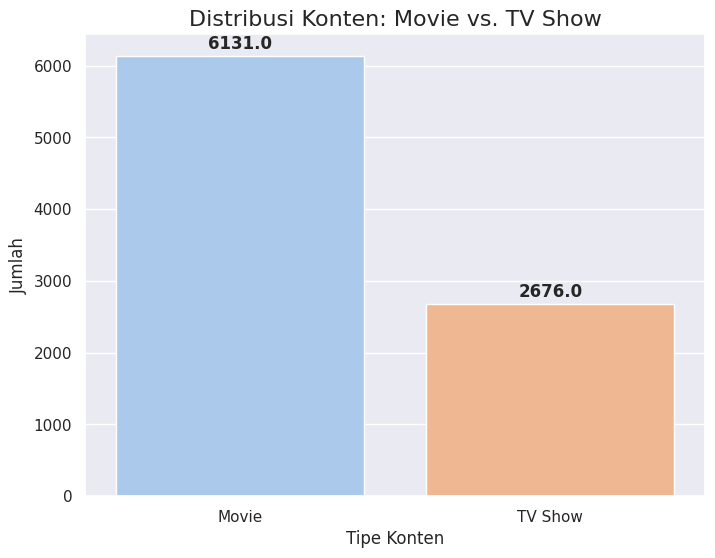

In [6]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x='type', data=df, palette='pastel', order=df['type'].value_counts().index)
plt.title('Distribusi Konten: Movie vs. TV Show', fontsize=16)
plt.xlabel('Tipe Konten', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan label jumlah di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', weight='bold')

plt.show()

In [8]:
# prompt: buat kode untuk mengecek format kolom time added

# Cek format kolom 'date_added'
print("\n--- Cek Format Kolom 'date_added' ---")
try:
    pd.to_datetime(df['date_added'])
    print("Kolom 'date_added' memiliki format tanggal yang valid.")
except ValueError as e:
    print(f"Kolom 'date_added' kemungkinan memiliki format yang tidak valid: {e}")

# Jika ingin melihat beberapa contoh nilai di kolom 'date_added'
print("\nBeberapa contoh nilai di kolom 'date_added':")
print(df['date_added'].head())

# Jika perlu, konversi kolom 'date_added' ke format datetime
# df['date_added'] = pd.to_datetime(df['date_added'])


--- Cek Format Kolom 'date_added' ---
Kolom 'date_added' kemungkinan memiliki format yang tidak valid: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Beberapa contoh nilai di kolom 'date_added':
0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object


/tmp/ipython-input-10-2967932014.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='added_year', data=df, palette='viridis', order=df['added_year'].value_counts().index.sort_values())


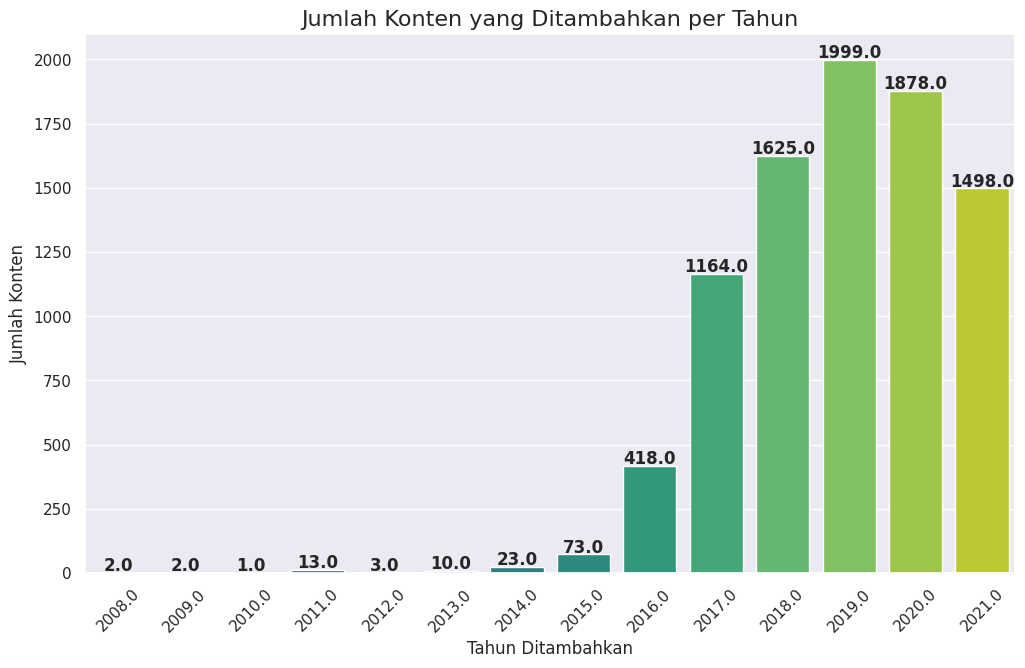

In [10]:
# Feature Engineering: Mengubah tipe data dan mengekstrak tahun
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year

# Visualisasi
plt.figure(figsize=(12, 7))
sns.set(style="darkgrid") # Ensure the darkgrid style is set
ax = sns.countplot(x='added_year', data=df, palette='viridis', order=df['added_year'].value_counts().index.sort_values())
plt.title('Jumlah Konten yang Ditambahkan per Tahun', fontsize=16)
plt.xlabel('Tahun Ditambahkan', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)
plt.xticks(rotation=45)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', weight='bold')

plt.show()

/tmp/ipython-input-12-2449490594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='duration_seasons', data=df_tvshows, ax=ax2, palette='plasma', order=df_tvshows['duration_seasons'].value_counts().index)


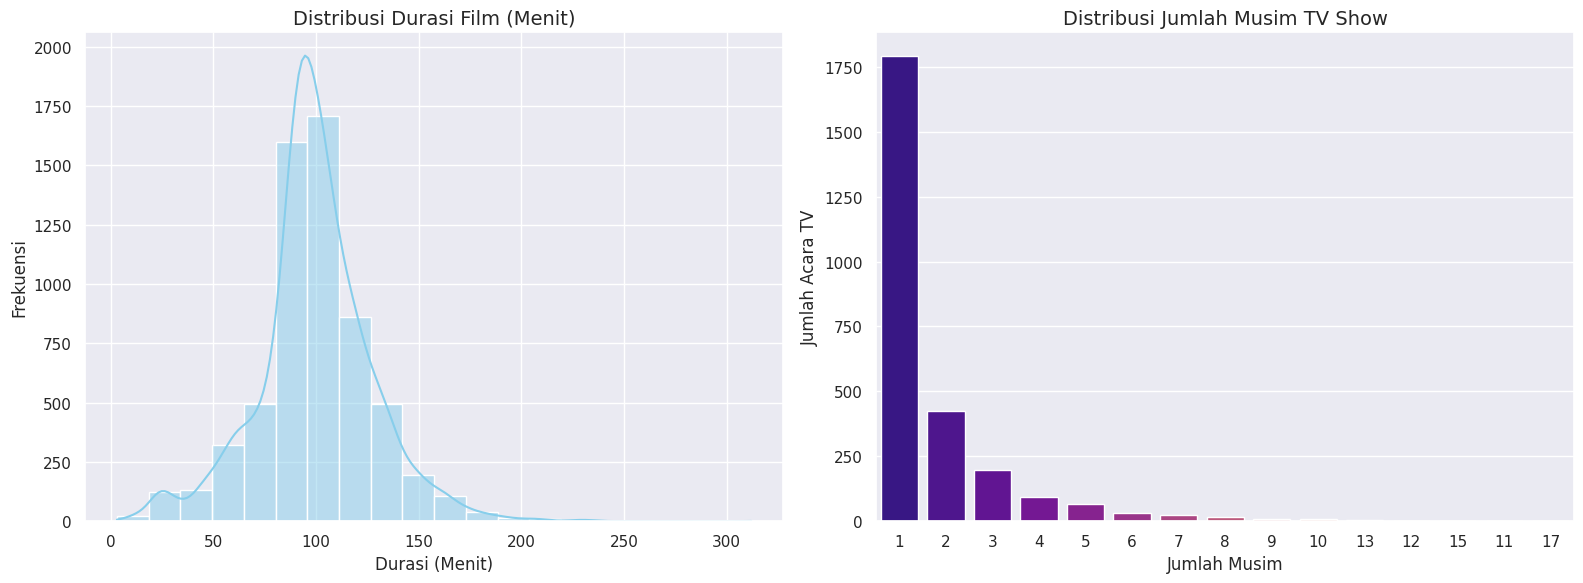

In [12]:
# Memisahkan DataFrame
df_movies = df[df['type'] == 'Movie'].copy()
df_tvshows = df[df['type'] == 'TV Show'].copy()

# Feature Engineering: Membersihkan dan mengubah kolom 'duration'
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)
df_tvshows['duration_seasons'] = df_tvshows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot untuk Durasi Film
sns.histplot(df_movies['duration'], bins=20, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribusi Durasi Film (Menit)', fontsize=14)
ax1.set_xlabel('Durasi (Menit)', fontsize=12)
ax1.set_ylabel('Frekuensi', fontsize=12)

# Plot untuk Jumlah Musim TV Show
sns.countplot(x='duration_seasons', data=df_tvshows, ax=ax2, palette='plasma', order=df_tvshows['duration_seasons'].value_counts().index)
ax2.set_title('Distribusi Jumlah Musim TV Show', fontsize=14)
ax2.set_xlabel('Jumlah Musim', fontsize=12)
ax2.set_ylabel('Jumlah Acara TV', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-14-2583339181.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Genre', x='Jumlah', data=genre_counts, palette='mako')


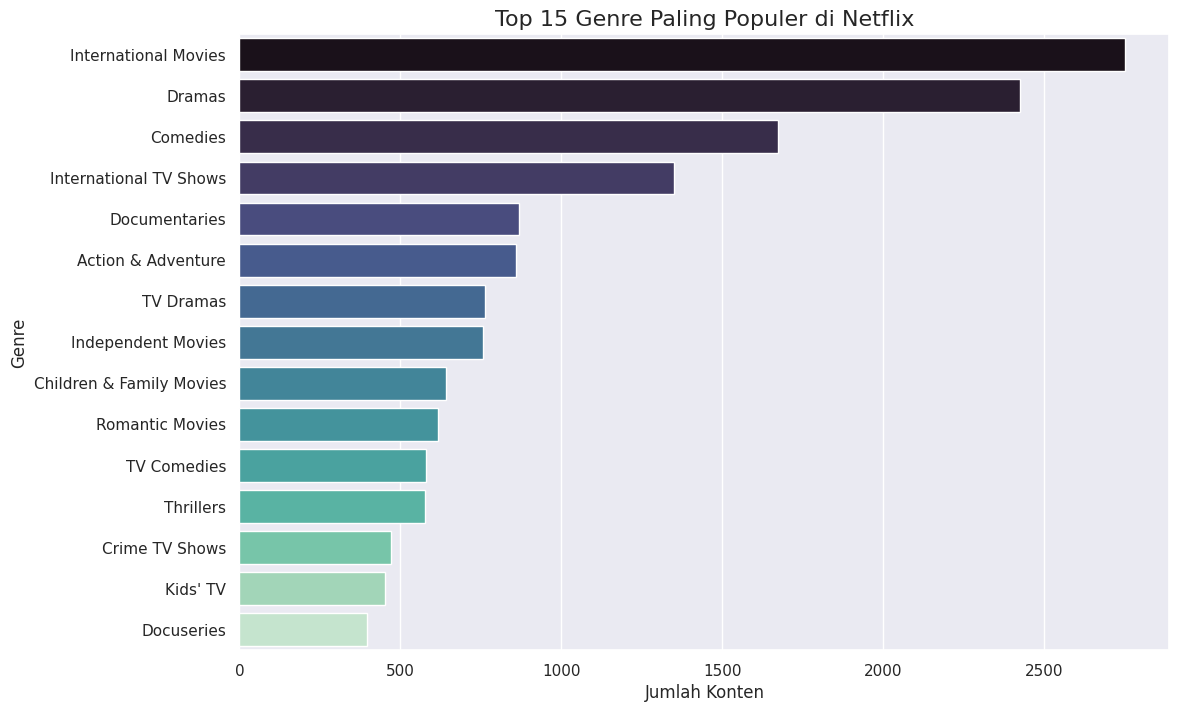

In [14]:
# Feature Engineering: Memisahkan genre dan menghitungnya
from collections import Counter

# Menggunakan 'explode' untuk memisahkan setiap genre ke baris baru
genres = df['listed_in'].str.split(', ').explode()
genre_counts = pd.DataFrame(Counter(genres).most_common(15), columns=['Genre', 'Jumlah'])

# Visualisasi Top 15 Genre
plt.figure(figsize=(12, 8))
sns.barplot(y='Genre', x='Jumlah', data=genre_counts, palette='mako')
plt.title('Top 15 Genre Paling Populer di Netflix', fontsize=16)
plt.xlabel('Jumlah Konten', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

/tmp/ipython-input-16-92066670.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Negara', x='Jumlah', data=country_counts, palette='rocket')


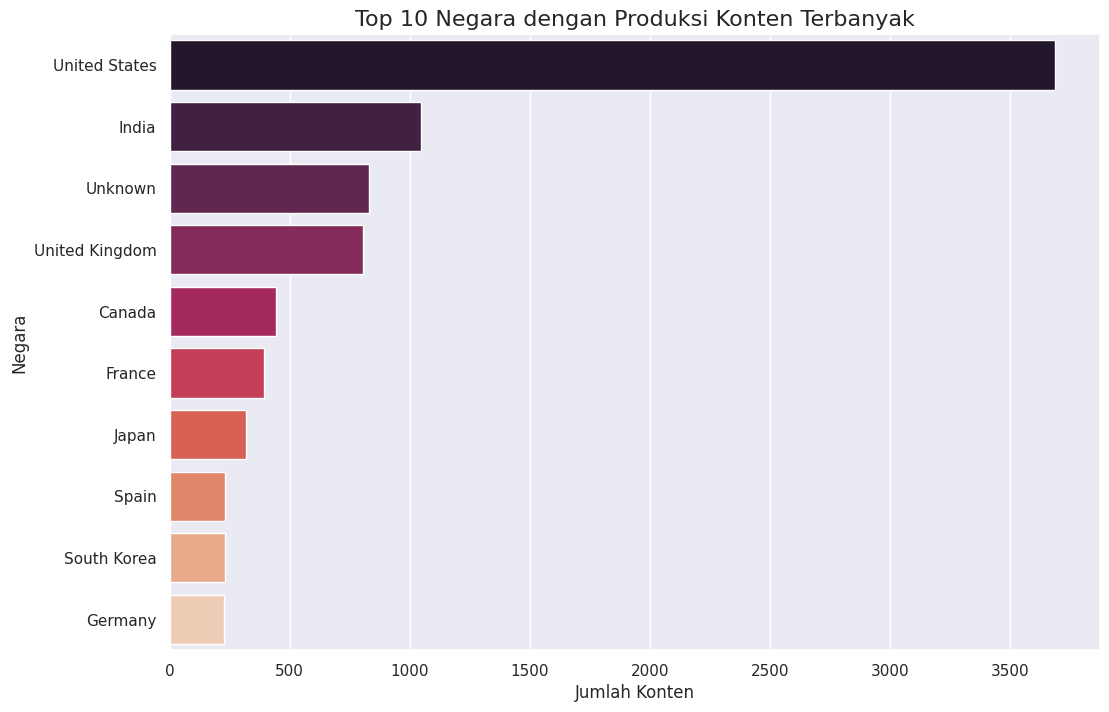

In [16]:
# Feature Engineering: Mengisi nilai kosong dan memisahkan negara
df['country'] = df['country'].fillna('Unknown')
countries = df['country'].str.split(', ').explode()
country_counts = pd.DataFrame(Counter(countries).most_common(10), columns=['Negara', 'Jumlah'])

# Visualisasi Top 10 Negara
plt.figure(figsize=(12, 8))
sns.barplot(y='Negara', x='Jumlah', data=country_counts, palette='rocket')
plt.title('Top 10 Negara dengan Produksi Konten Terbanyak', fontsize=16)
plt.xlabel('Jumlah Konten', fontsize=12)
plt.ylabel('Negara', fontsize=12)
plt.show()

/tmp/ipython-input-17-1473649249.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sutradara', x='Jumlah Karya', data=director_counts, palette='crest')


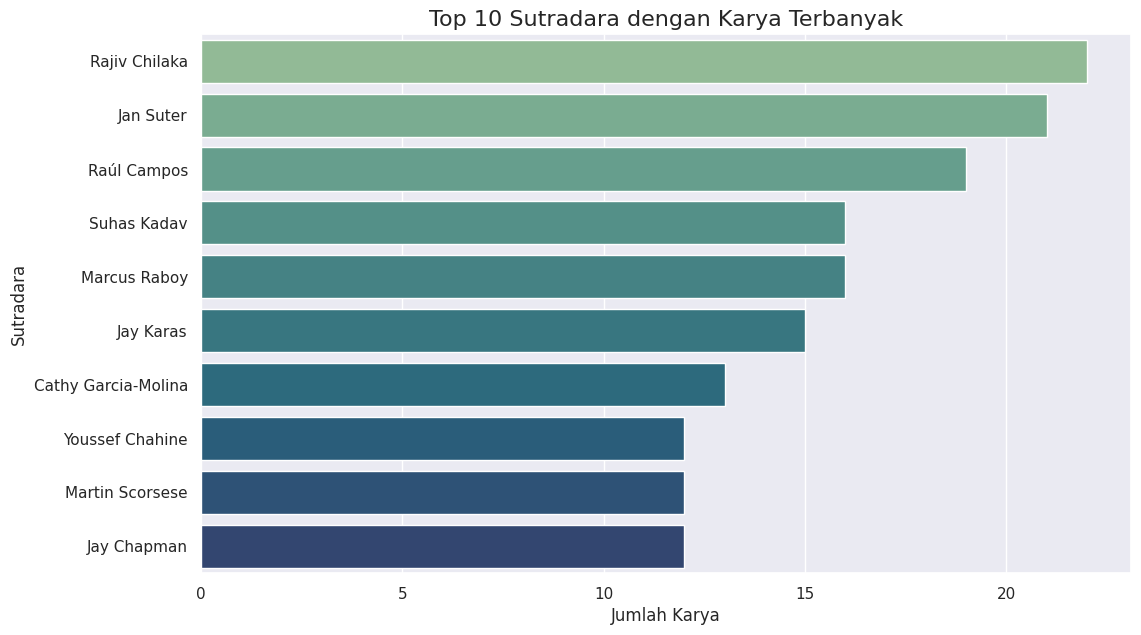

In [17]:
# Feature Engineering: Mengisi nilai kosong
df_directors = df['director'].dropna()
directors = df_directors.str.split(', ').explode()
director_counts = pd.DataFrame(Counter(directors).most_common(10), columns=['Sutradara', 'Jumlah Karya'])

# Visualisasi
plt.figure(figsize=(12, 7))
sns.barplot(y='Sutradara', x='Jumlah Karya', data=director_counts, palette='crest')
plt.title('Top 10 Sutradara dengan Karya Terbanyak', fontsize=16)
plt.xlabel('Jumlah Karya', fontsize=12)
plt.ylabel('Sutradara', fontsize=12)
plt.show()

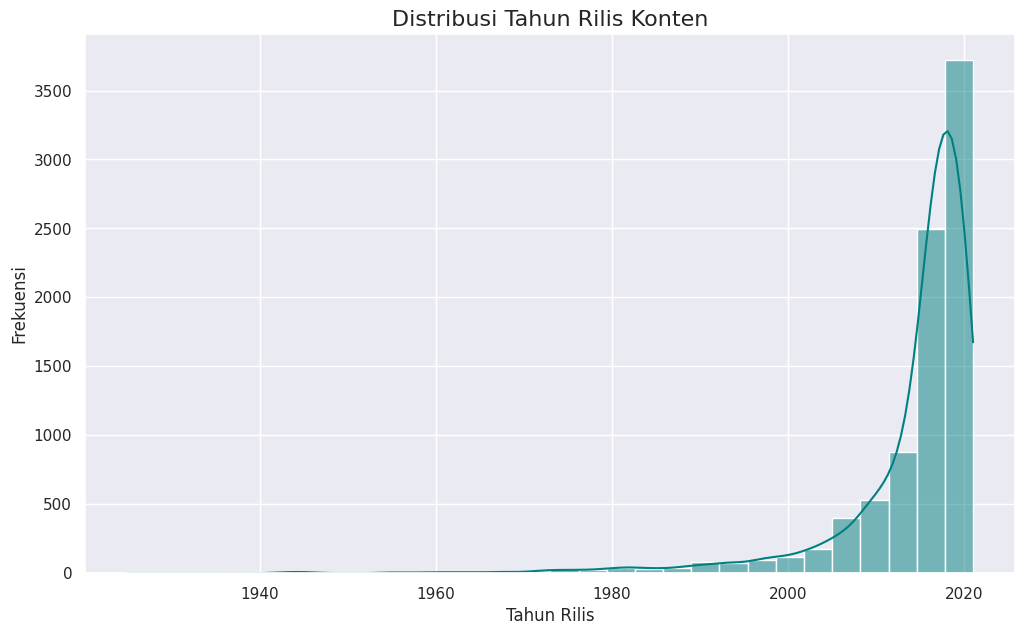

In [19]:
# prompt: tambahkan kode untuk melihat distribusi release_year dan rating

# Distribusi release_year
plt.figure(figsize=(12, 7))
sns.histplot(df['release_year'], bins=30, kde=True, color='teal')
plt.title('Distribusi Tahun Rilis Konten', fontsize=16)
plt.xlabel('Tahun Rilis', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


/tmp/ipython-input-20-3825274747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='cubehelix', order=df['rating'].value_counts().index)


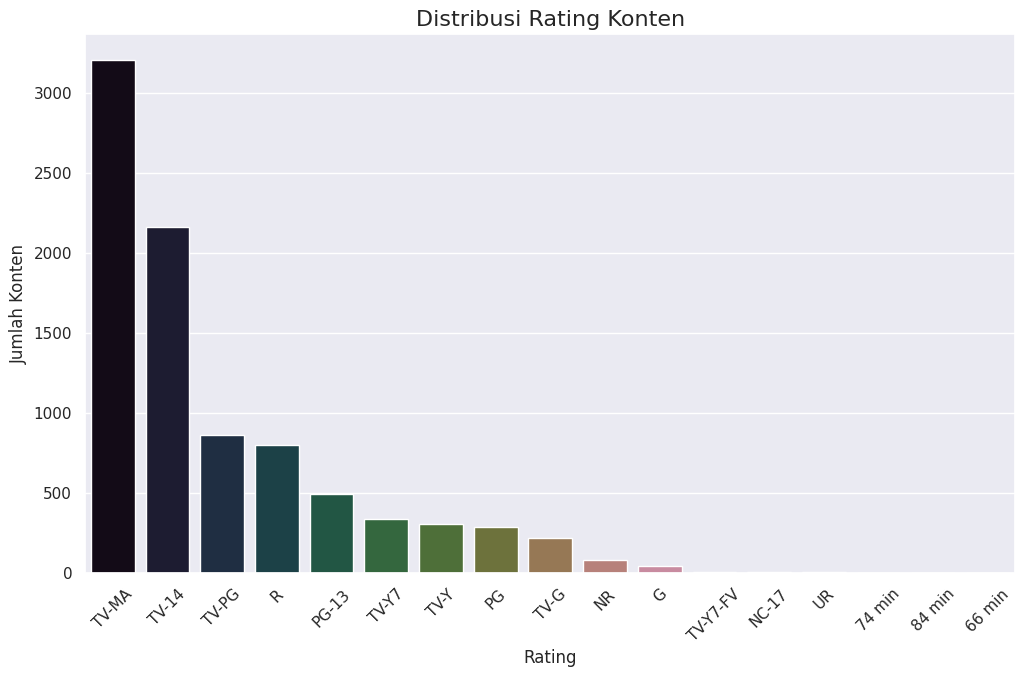

In [20]:
# Distribusi rating
plt.figure(figsize=(12, 7))
sns.countplot(x='rating', data=df, palette='cubehelix', order=df['rating'].value_counts().index)
plt.title('Distribusi Rating Konten', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)
plt.xticks(rotation=45)
plt.show()


--- Baris dengan Rating Tidak Konsisten (Mengandung ' min') ---
Empty DataFrame
Columns: [title, rating, type, duration]
Index: []

--- Distribusi Rating Setelah Penanganan ---
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Unknown        3
UR             3
Name: count, dtype: int64


/tmp/ipython-input-23-1044267290.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='cubehelix', order=df['rating'].value_counts().index)


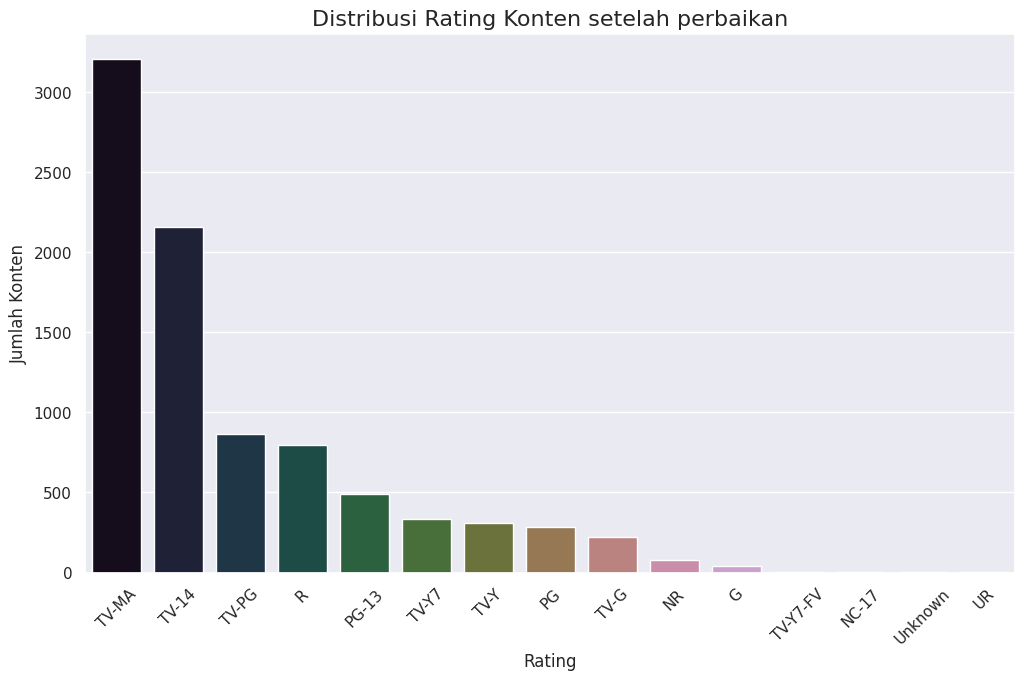

In [23]:
# prompt: buat penanganan untuk rating konten yang tidak sesuai 74 min, 84 min dan 66 min

# Feature Engineering: Penanganan rating konten yang tidak sesuai
# Asumsi: rating yang tidak sesuai adalah rating durasi (misalnya '74 min')
# Kita akan mengidentifikasi baris dengan rating yang mengandung ' min' dan melihatnya
inconsistent_ratings = df[df['rating'].str.contains(' min', na=False)]

print("\n--- Baris dengan Rating Tidak Konsisten (Mengandung ' min') ---")
print(inconsistent_ratings[['title', 'rating', 'type', 'duration']])

# Opsi Penanganan:
# 1. Hapus baris ini (jika jumlahnya sedikit dan tidak signifikan)
# df = df[~df['rating'].str.contains(' min', na=False)].copy()

# 2. Coba perbaiki atau isi dengan nilai yang paling umum atau 'Unknown'
# Untuk contoh ini, kita asumsikan ini adalah kesalahan data dan baris ini harusnya tidak memiliki rating 'durasi'.
# Kita bisa setel rating ini menjadi NaN atau 'Unknown'
df.loc[df['rating'].str.contains(' min', na=False), 'rating'] = 'Unknown' # atau pd.NA atau 'Missing'

# Verifikasi setelah penanganan
print("\n--- Distribusi Rating Setelah Penanganan ---")
print(df['rating'].value_counts())

# Distribusi rating
plt.figure(figsize=(12, 7))
sns.countplot(x='rating', data=df, palette='cubehelix', order=df['rating'].value_counts().index)
plt.title('Distribusi Rating Konten setelah perbaikan', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)
plt.xticks(rotation=45)
plt.show()